# Support Vector Machine (SVM) Model 
    
   

 The Diabetes Dataset involves predicting the onset of diabetes within 5 years, given medical details.
    It is a binary classification problem and the two classes signify:
        Yes, diabetes will show up within next 5 years
        No, diabetes will not show up within next 5 years

   

In [202]:
#import required libraries

#To use pandas Dataframe and Numpy
import pandas as pd
import numpy as np

#import required libraries for plotting the graphs for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Import svm model
from sklearn import svm  

#To get classification & accuracy metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#ignore warnings for deprecations to get clean output
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

# 	Read the dataset



In [203]:
#Read the given dataset
df = pd.read_csv('Diabetes.csv')

In [204]:
#Print top 5 rows to validate proper file reading
df.head()

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Lookout for missing/null values


In [205]:
#Print the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
No. of times pregnant                             768 non-null int64
Plasma glucose concentration                      768 non-null int64
Diastolic blood pressure (mm Hg)                  768 non-null int64
Triceps skin fold thickness (mm)                  768 non-null int64
2-Hour serum insulin (mu U/ml)                    768 non-null int64
Body mass index (weight in kg/(height in m)^2)    768 non-null float64
Diabetes pedigree function                        768 non-null float64
Age (years)                                       768 non-null int64
Class variable (0 or 1)                           768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Heatmap : To identify Null Values (If any)

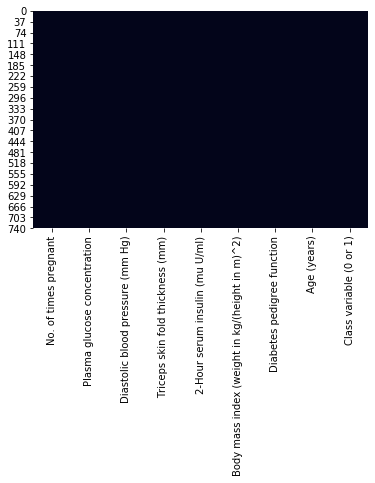

In [206]:
#Check for null values 
sns.heatmap(df.isnull(),cbar=False)

Inference : No null values found.

# Heatmap : To get the correlations among given data

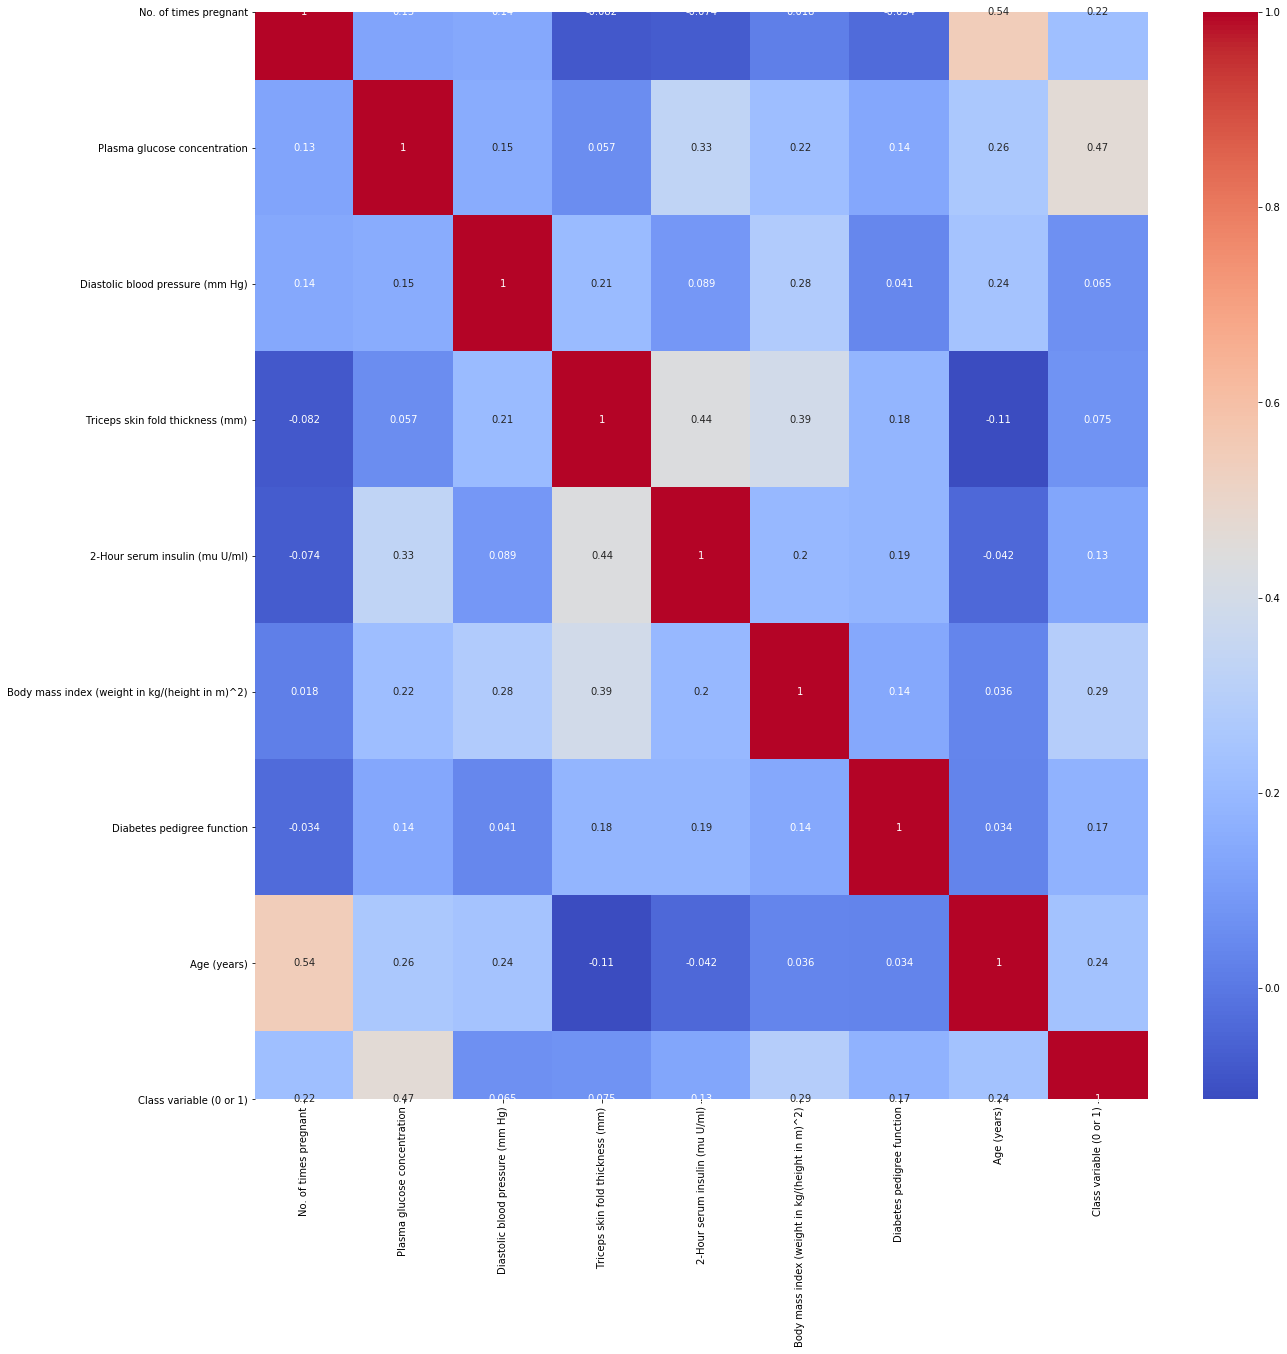

In [207]:
#Check the corelation between given features

#Get the correlation Matrix
corr_matrix = df.corr()

#Index the correlated matrix
corr_matrix_idx = corr_matrix.index

#Define the space to be used for plot
plt.figure(figsize=(20,20))

#Plot the heatmap 
sns.heatmap(df[corr_matrix_idx].corr(), annot=True, cmap='coolwarm')
plt.show()

Inference : Nothing is correlated in th given dataset

# Reporting mean and median discrepancies in the features

In [208]:
#Describe the dataset
df.describe()

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Inference: Features like "Plasma Glucose concentration" and "2-Hour serum insulin" are widely spread out 
    from their mean values. We will use histogram to get the dataset distribution. Lets closely observe Mean & Median. 

In [209]:
#Get the mean for all features 
df.mean()

No. of times pregnant                               3.845052
Plasma glucose concentration                      120.894531
Diastolic blood pressure (mm Hg)                   69.105469
Triceps skin fold thickness (mm)                   20.536458
2-Hour serum insulin (mu U/ml)                     79.799479
Body mass index (weight in kg/(height in m)^2)     31.992578
Diabetes pedigree function                          0.471876
Age (years)                                        33.240885
Class variable (0 or 1)                             0.348958
dtype: float64

In [210]:
#Get the median for all features
df.median()

No. of times pregnant                               3.0000
Plasma glucose concentration                      117.0000
Diastolic blood pressure (mm Hg)                   72.0000
Triceps skin fold thickness (mm)                   23.0000
2-Hour serum insulin (mu U/ml)                     30.5000
Body mass index (weight in kg/(height in m)^2)     32.0000
Diabetes pedigree function                          0.3725
Age (years)                                        29.0000
Class variable (0 or 1)                             0.0000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CC1408EC8>,
      dtype=object)

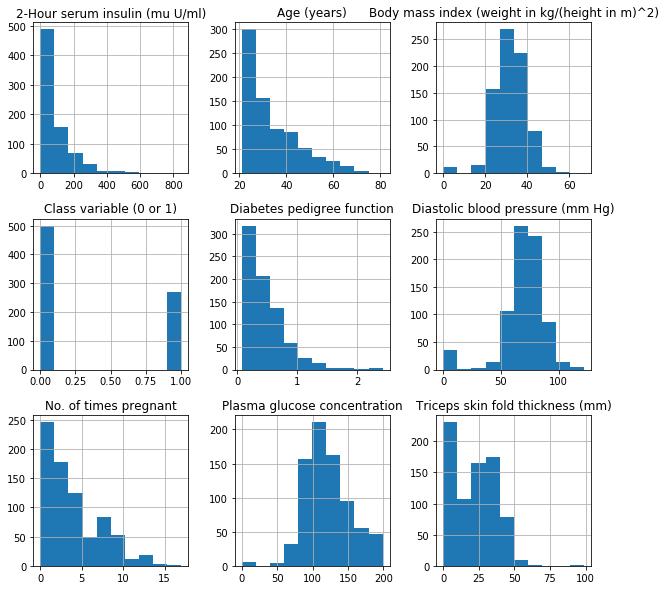

In [211]:
#Lets see the data distribution 
df.hist(figsize = (10,10))

C:\Users\shaaruns.CORPDOM\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


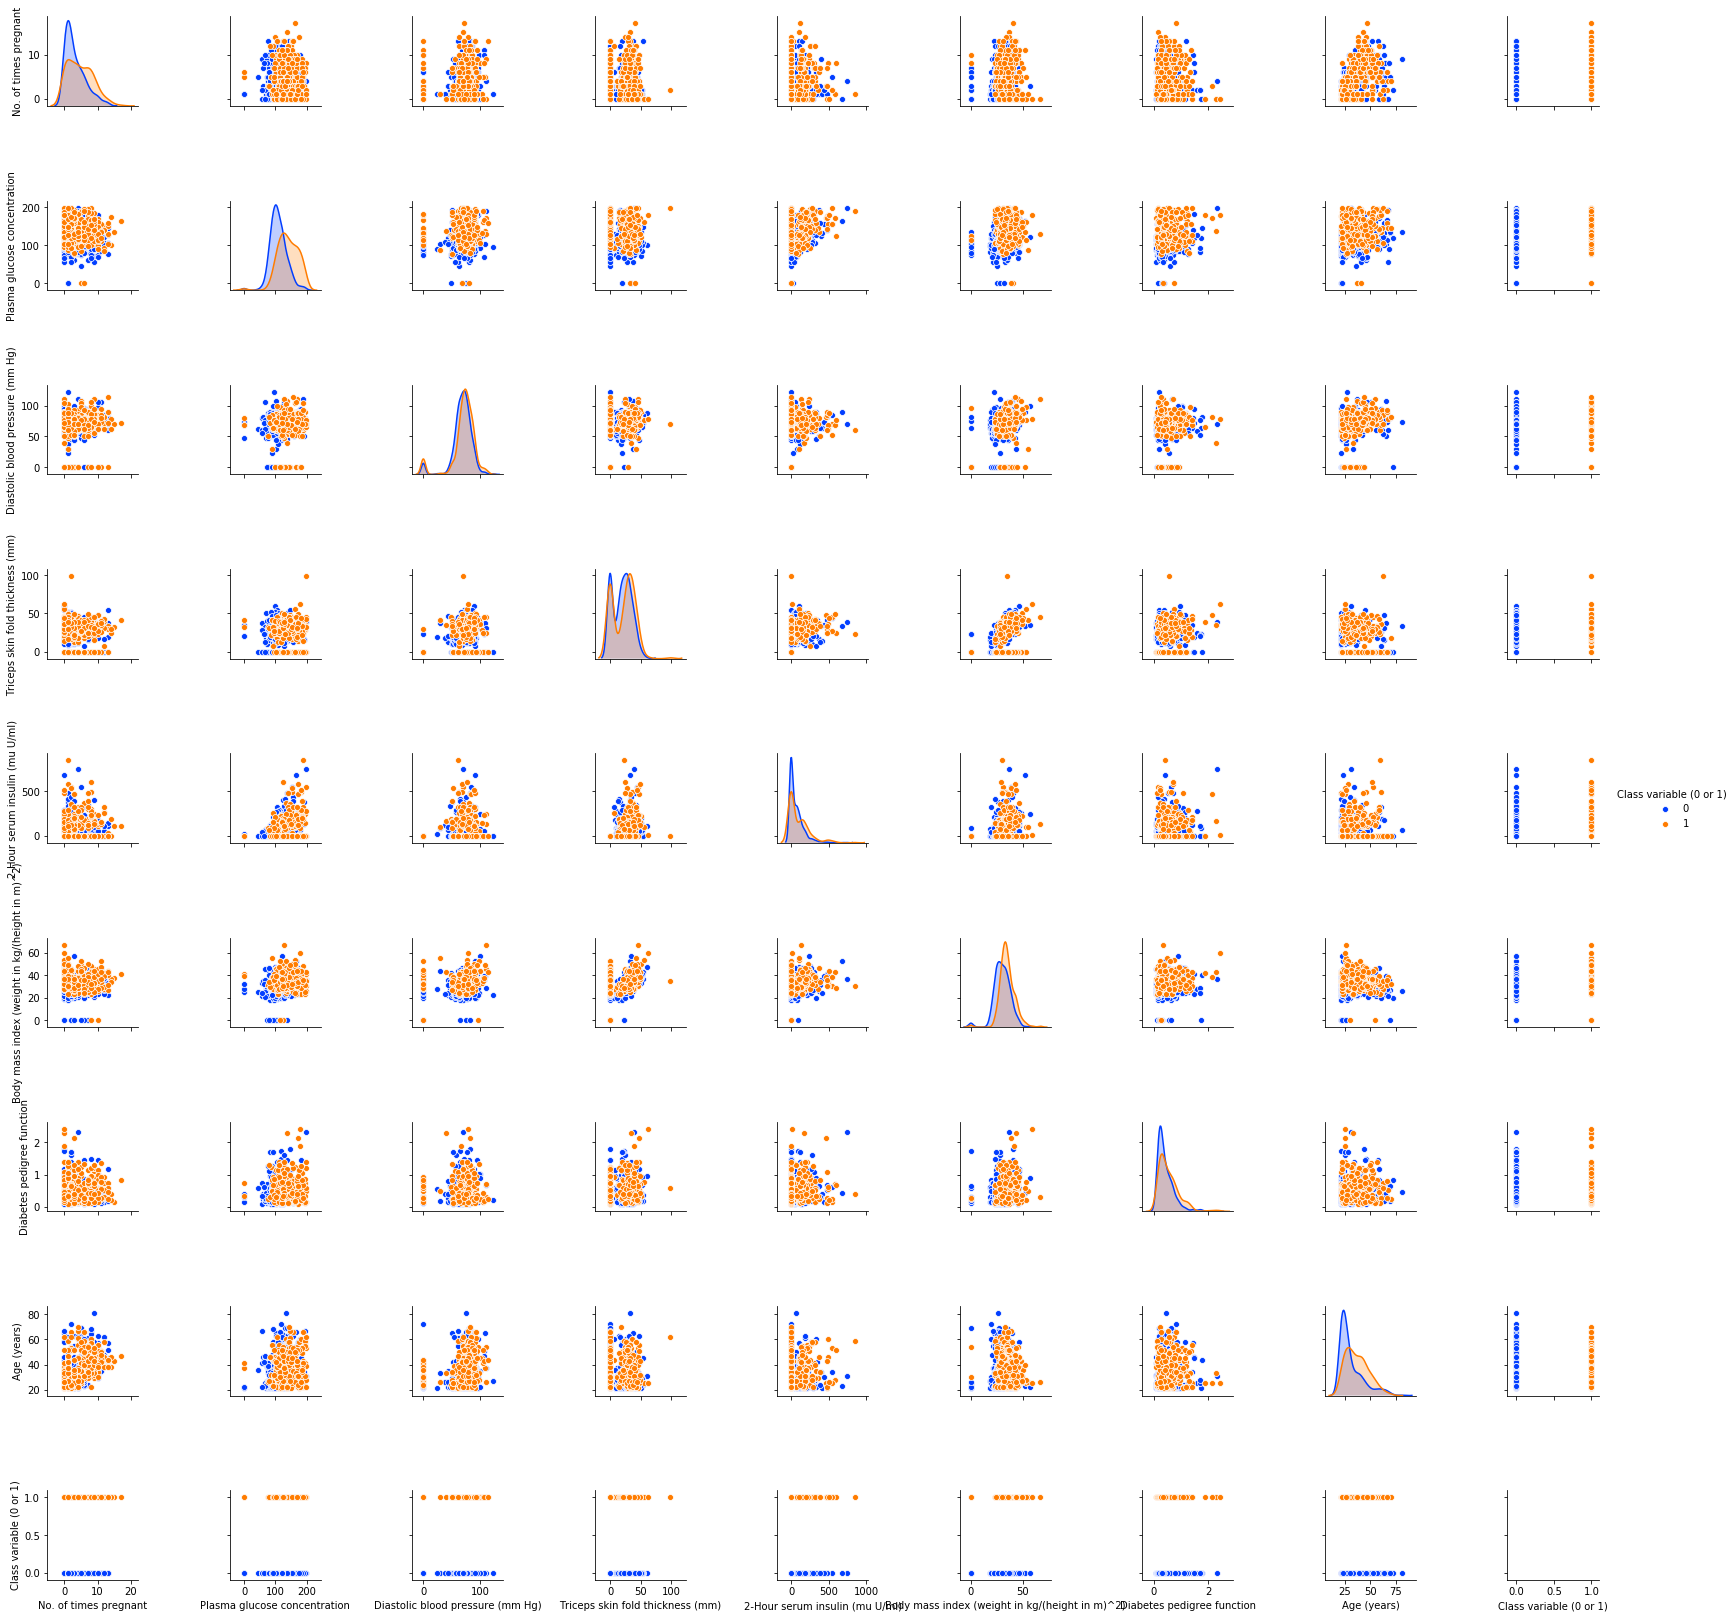

In [212]:
#Check the relation between attributes & target feature
sns.pairplot(df, hue='Class variable (0 or 1)', size=2.5, palette="bright")

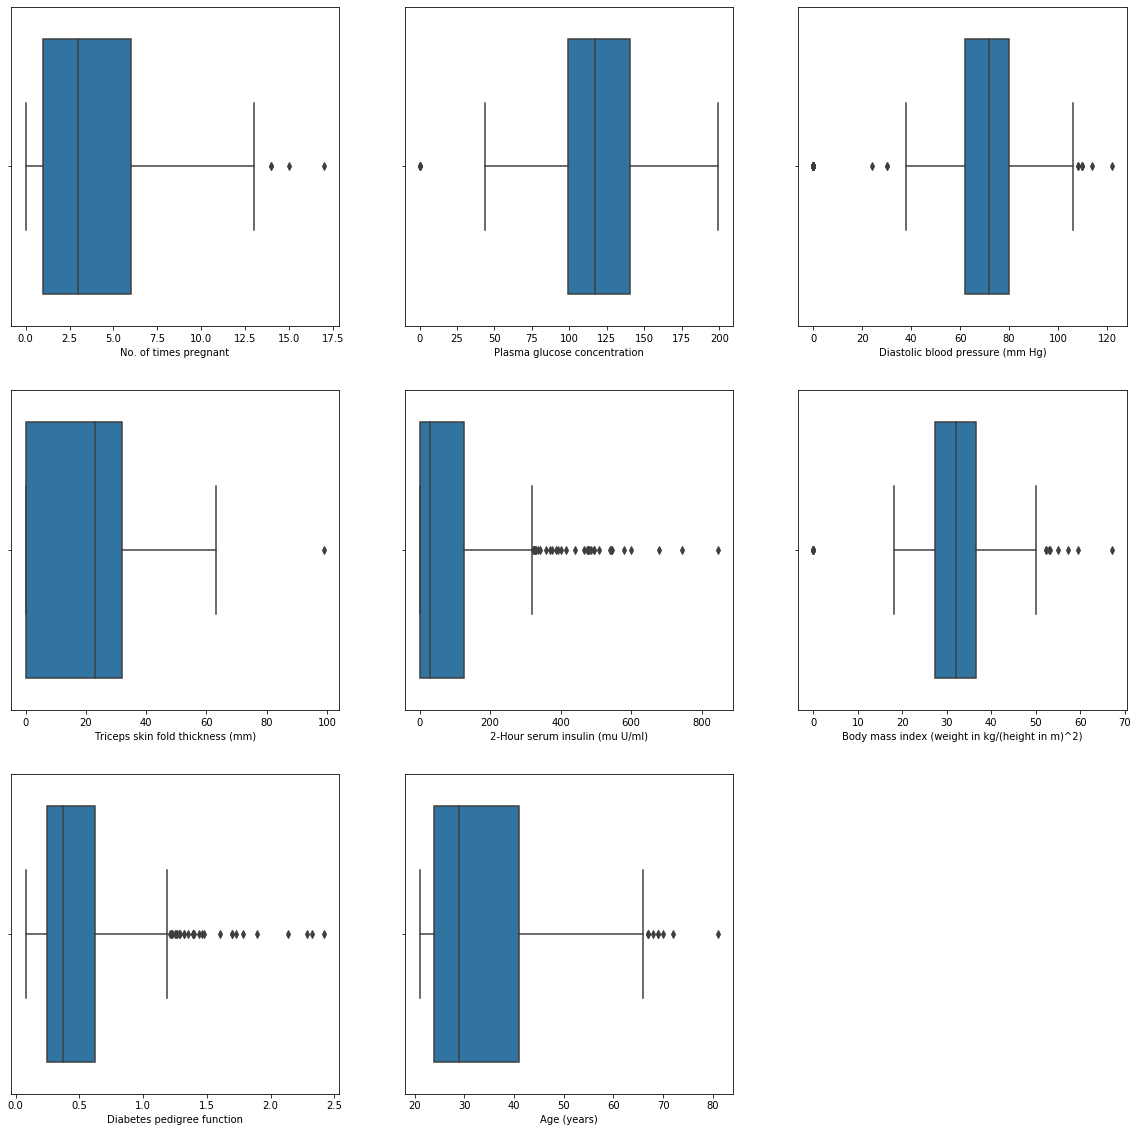

In [213]:
#Lets check the outliers in the dataset
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x=df['No. of times pregnant'])

plt.subplot(3,3,2)
sns.boxplot(x=df['Plasma glucose concentration'])

plt.subplot(3,3,3)
sns.boxplot(x=df['Diastolic blood pressure (mm Hg)'])

plt.subplot(3,3,4)
sns.boxplot(x=df['Triceps skin fold thickness (mm)'])

plt.subplot(3,3,5)
sns.boxplot(x=df['2-Hour serum insulin (mu U/ml)'])

plt.subplot(3,3,6)
sns.boxplot(x=df['Body mass index (weight in kg/(height in m)^2)'])

plt.subplot(3,3,7)
sns.boxplot(x=df['Diabetes pedigree function'])

plt.subplot(3,3,8)
sns.boxplot(x=df['Age (years)'])

plt.show()


In [214]:
#Get the list of records having 0 as value 
print ("Total record set            : {0}".format(len(df)))
print ("0 value for No. of times pregnant   : {0}".format(len(df.loc[df['No. of times pregnant'] == 0])))
print ("0 value for Plasma glucose concentration   : {0}".format(len(df.loc[df['Plasma glucose concentration'] == 0])))
print ("0 value for Diastolic blood pressure (mm Hg)   : {0}".format(len(df.loc[df['Diastolic blood pressure (mm Hg)'] == 0])))
print ("0 value for Triceps skin fold thickness (mm)   : {0}".format(len(df.loc[df['Triceps skin fold thickness (mm)'] == 0])))
print ("0 value for 2-Hour serum insulin (mu U/ml)   : {0}".format(len(df.loc[df['2-Hour serum insulin (mu U/ml)'] == 0])))
print ("0 value for Body mass index (weight in kg/(height in m)^2)   : {0}".format(len(df.loc[df['Body mass index (weight in kg/(height in m)^2)'] == 0])))
print ("0 value for Diabetes pedigree function   : {0}".format(len(df.loc[df['Diabetes pedigree function'] == 0])))
print ("0 value for Age (years)   : {0}".format(len(df.loc[df['Age (years)'] == 0])))




Total record set            : 768
0 value for No. of times pregnant   : 111
0 value for Plasma glucose concentration   : 5
0 value for Diastolic blood pressure (mm Hg)   : 35
0 value for Triceps skin fold thickness (mm)   : 227
0 value for 2-Hour serum insulin (mu U/ml)   : 374
0 value for Body mass index (weight in kg/(height in m)^2)   : 11
0 value for Diabetes pedigree function   : 0
0 value for Age (years)   : 0


# Data Cleaning & Address invalid values

In [215]:
#Rename the cols for better readability 
df.rename(columns={"Body mass index (weight in kg/(height in m)^2)":"BMI"}, inplace = True)
df.rename(columns={"No. of times pregnant":"Pregnant_Count"}, inplace = True)
df.rename(columns={"Plasma glucose concentration":"Plasma_Glucose_Concentration"}, inplace = True)
df.rename(columns={"Diastolic blood pressure (mm Hg)":"Diastolic_BP"}, inplace = True)
df.rename(columns={"Triceps skin fold thickness (mm)":"Triceps_Skin_Fold_Thickness"}, inplace = True)
df.rename(columns={"2-Hour serum insulin (mu U/ml)":"Two_hr_Serum_Insulin"}, inplace = True)
df.rename(columns={"Diabetes pedigree function":"Diabetes_Pedigree_Function"}, inplace = True)
df.rename(columns={"Age (years)":"Age"}, inplace = True)
df.rename(columns={"Class variable (0 or 1)":"Class_Variable"}, inplace = True)
df.head()

,Pregnant_Count,Plasma_Glucose_Concentration,Diastolic_BP,Triceps_Skin_Fold_Thickness,Two_hr_Serum_Insulin,BMI,Diabetes_Pedigree_Function,Age,Class_Variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [216]:
#Need to fill right values for 0 as these are missing values or reading not taken
#1. Diastolic blood pressure (mm Hg)
#2. Body mass index (weight in kg/(height in m)^2)
#Replace 0 with median or mean based on Data distribution
#Median : if skewness in the data
#Mean: If normal distribution 
#Mode: Catogorical replacement 

df.loc[df.BMI == 0, "BMI"] = df.BMI.mean()
df.loc[df.Diastolic_BP == 0, "Diastolic_BP"] = df.Diastolic_BP.mean()
df.loc[df.Plasma_Glucose_Concentration == 0, "Plasma_Glucose_Concentration"] = df.Plasma_Glucose_Concentration.mean()
df.loc[df.Two_hr_Serum_Insulin == 0, "Two_hr_Serum_Insulin"] = df.Two_hr_Serum_Insulin.median()
df.loc[df.Triceps_Skin_Fold_Thickness == 0, "Triceps_Skin_Fold_Thickness"] = df.Triceps_Skin_Fold_Thickness.median()



In [217]:
#Get the list of records having 0 as value 
print ("Total record set            : {0}".format(len(df)))
print ("0 value for No. of times pregnant   : {0}".format(len(df.loc[df['Pregnant_Count'] == 0])))
print ("0 value for Plasma glucose concentration   : {0}".format(len(df.loc[df['Plasma_Glucose_Concentration'] == 0])))
print ("0 value for Diastolic blood pressure (mm Hg)   : {0}".format(len(df.loc[df['Diastolic_BP'] == 0])))
print ("0 value for Triceps skin fold thickness (mm)   : {0}".format(len(df.loc[df['Triceps_Skin_Fold_Thickness'] == 0])))
print ("0 value for 2-Hour serum insulin (mu U/ml)   : {0}".format(len(df.loc[df['Two_hr_Serum_Insulin'] == 0])))
print ("0 value for Body mass index (weight in kg/(height in m)^2)   : {0}".format(len(df.loc[df['BMI'] == 0])))
print ("0 value for Diabetes pedigree function   : {0}".format(len(df.loc[df['Diabetes_Pedigree_Function'] == 0])))
print ("0 value for Age (years)   : {0}".format(len(df.loc[df['Age'] == 0])))

Total record set            : 768
0 value for No. of times pregnant   : 111
0 value for Plasma glucose concentration   : 0
0 value for Diastolic blood pressure (mm Hg)   : 0
0 value for Triceps skin fold thickness (mm)   : 0
0 value for 2-Hour serum insulin (mu U/ml)   : 0
0 value for Body mass index (weight in kg/(height in m)^2)   : 0
0 value for Diabetes pedigree function   : 0
0 value for Age (years)   : 0


In [218]:
df.describe()

,Pregnant_Count,Plasma_Glucose_Concentration,Diastolic_BP,Triceps_Skin_Fold_Thickness,Two_hr_Serum_Insulin,BMI,Diabetes_Pedigree_Function,Age,Class_Variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Assumption: Keeping Pregnant_Count as 0 a valid data. 

In [219]:
#Dataset Scaling to Z score 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Class_Variable"],axis = 1),),
        columns=['Pregnant_Count', 'Plasma_Glucose_Concentration', 'Diastolic_BP',
       'Triceps_Skin_Fold_Thickness', 'Two_hr_Serum_Insulin', 'BMI',
       'Diabetes_Pedigree_Function', 'Age'])
y = df.Class_Variable

# Ensure that data is divided with more or less equal ration of class 1 and 0 in both test and train set

In [220]:
# Split dataset into training set and test set with stratify as yes.
#If stratify not None, data is split in a stratified fashion, using this as the class labels.

# 75% training data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100,stratify=y) 

In [221]:
#Use GridCV to get best hyperparameters to tune the algorithm
from sklearn.model_selection import GridSearchCV

#Parameters to evaluate
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

#Setting the model
svc = svm.SVC()

#Serach the best hyperparameters for the model
clf = GridSearchCV(svc, parameters,cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

#Build the model for given dataset
clf.fit(X_train, y_train)

#Predict the model 
y_pred = clf.predict(X_test)
print("Accuracy with GridCV:",metrics.accuracy_score(y_test, y_pred))

#Get the best evaluated parameters 
best_params = clf.best_params_
print (best_params)


Accuracy with GridCV: 0.7604166666666666
{'C': 1, 'kernel': 'linear'}


In [222]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=1) # Choosing Linear Kernel with C=1 as its giving better results then C=10. 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.78125


In [223]:
#Get the confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[113,  12],
       [ 30,  37]], dtype=int64)

In [224]:
#Another option to get the confusion matrix using crosstab
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,113,12,125
1,30,37,67
All,143,49,192


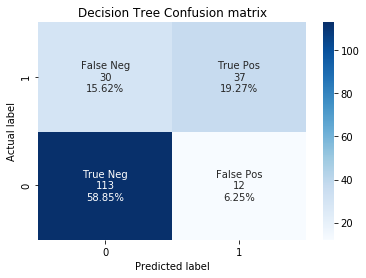

In [225]:
#Visualize the Confusion Matrix in a more descriptive way 

#Possible labels for 4 quadrent 
group_names = ['True Neg','False Pos','False Neg','True Pos']

#Assign the values from confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

#Get the percentage values 
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

#Group the above three information as label
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

#Assign the shape of 2x2 for possible 4 label values
labels = np.asarray(labels).reshape(2,2)

#Set the parameters for Matplot
fig, ax = plt.subplots()

#Plot the heatmap with above labels 
sns.heatmap(cm, annot=labels,fmt='', cmap="Blues",cbar_kws={"orientation": "vertical"})

ax.xaxis.set_label_position("bottom") #Set label position for X-axis as botton
#plt.tight_layout() #Layout Setting
plt.title('Decision Tree Confusion matrix', y=1.1) #Set the title 
plt.ylabel('Actual label') #Set the Y-axis Label
plt.xlabel('Predicted label') #Set the X-axis Label

ax.set_ylim([0,2]) #Set the label alignment setting 
plt.show() #Show the Plot 


In [226]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       125
           1       0.76      0.55      0.64        67

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.78      0.78      0.77       192



Inference :
    
    The model is build as Linear SVM kernel with ~85% F1 score for class 0 and ~65% F1 score for class 1
    Accuracy  : ~79% 
    Recall    : ~91%
    Precision : ~80% 